# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy.optimize import curve_fit
import scipy.special as sf

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

Code the equations into a function 

In [35]:
D = 15
rho = 7.8
vi = 300
angle= 50
gamma = .25
lambd = 10000
vix = vi* np.cos(np.radians(angle))
viy = vi*np.sin(np.radians(angle))
ti = 0
tf = 3.5
#find mass of ball
# rho = m/V => m = V * rho = (4/3 pi r^3) 
mass = rho*((4/3) * np.pi * (D/2)**3)/1000
vls=[0,0,vix,viy]
t= np.linspace(ti,tf, 1000)

In [34]:
def proj_vac(time, vals):
    x,y,v_x,v_y = vals
    dxdt = v_x
    dydt = v_y
    dvxdt =0
    dvydt=-1*mass*9.8
    return np.array([dxdt,dydt,dvxdt,dvydt])

    
    

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [37]:
solution= integrate.solve_ivp(proj_vac,(t_i,t_f),vls, method='RK45',t_eval = t)

xt= solution.y[0]
yt= solution.y[1]

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

The Horizontal range is: 674.9269901708673


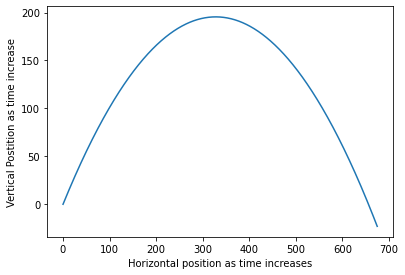

In [38]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(xt,yt)
hrange = xt[-1]
axes.set_xlabel("Horizontal position as time increases")
axes.set_ylabel("Vertical Postition as time increase")
print("The Horizontal range is:", hrange)


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [ ]:
#codes

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [3]:
#code

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [4]:
#codes

Plot the ball's trajecory and find it's horizontal range

In [5]:
#codes

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [ ]:
#code

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [ ]:
#codes

Plot the ball's trajectory and find it's horizontal range

In [6]:
#codes

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

In [7]:
#codes

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)